In [6]:
import numpy as np
from numpy import random
import pandas as pd
import os
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import math
import sys 
import shutil
from sklearn.metrics import mean_squared_error
from datetime import datetime
from pandas import read_csv
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit # or StratifiedShuffleSplit
from pandas import DataFrame
from pandas import DataFrame
import sktime
from sktime.classification.distance_based import KNeighborsTimeSeriesClassifier
from scipy.signal import find_peaks
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore")

In [7]:
#Data location
pathON="C:/Users/pierr/Documents_kanop/Shps/Pierre_points_for_louis/Bureau/interpo_ONOFF/Luigino/ON_data/"
pathOFF="C:/Users/pierr/Documents_kanop/Shps/Pierre_points_for_louis/Bureau/interpo_ONOFF/Luigino/OFF_data/"

# pathON="C:/Users/pierr/Documents_kanop/Shps/Pierre_points_for_louis/Bureau/interpo_ONOFF/ON_data/"
# pathOFF="C:/Users/pierr/Documents_kanop/Shps/Pierre_points_for_louis/Bureau/interpo_ONOFF/OFF_data/"

# pathON="C:/Users/pierr/Documents_kanop/Shps/Pierre_points_for_louis/Bureau/interpo_ONOFF/one_degree/ON_data/"
# pathOFF="C:/Users/pierr/Documents_kanop/Shps/Pierre_points_for_louis/Bureau/interpo_ONOFF/one_degree/OFF_data/"

# pathON="C:/Users/pierr/Documents_kanop/Shps/Pierre_points_for_louis/Bureau/interpo_ONOFF/two_five/ON_data/"
# pathOFF="C:/Users/pierr/Documents_kanop/Shps/Pierre_points_for_louis/Bureau/interpo_ONOFF/two_five/OFF_data/"

# pathON="C:/Users/pierr/Documents_kanop/Shps/Pierre_points_for_louis/Bureau/interpo_ONOFF/two_five_gold/ON_data/"
# pathOFF="C:/Users/pierr/Documents_kanop/Shps/Pierre_points_for_louis/Bureau/interpo_ONOFF/two_five_gold/OFF_data/"

# pathON="C:/Users/pierr/Documents_kanop/Shps/Pierre_points_for_louis/Bureau/interpo_ONOFF/three_five_gold/ON_data/"
# pathOFF="C:/Users/pierr/Documents_kanop/Shps/Pierre_points_for_louis/Bureau/interpo_ONOFF/three_five_gold/OFF_data/"

# pathON="C:/Users/pierr/Documents_kanop/Shps/Pierre_points_for_louis/Bureau/interpo_ONOFF/four/ON_data/"
# pathOFF="C:/Users/pierr/Documents_kanop/Shps/Pierre_points_for_louis/Bureau/interpo_ONOFF/four/OFF_data/"


# pathON="C:/Users/pierr/Documents_kanop/Shps/Pierre_points_for_louis/Bureau/interpo_ONOFF/two_err_bronze/ON_data/"
# pathOFF="C:/Users/pierr/Documents_kanop/Shps/Pierre_points_for_louis/Bureau/interpo_ONOFF/two_err_bronze/OFF_data/"

# pathON="C:/Users/pierr/Documents_kanop/Shps/Pierre_points_for_louis/Bureau/interpo_ONOFF/four_err_bronze/ON_data/"
# pathOFF="C:/Users/pierr/Documents_kanop/Shps/Pierre_points_for_louis/Bureau/interpo_ONOFF/four_err_bronze/OFF_data/"

# pathON="C:/Users/pierr/Documents_kanop/Shps/Pierre_points_for_louis/Bureau/interpo_ONOFF/one_err_bronze/ON_data/"
# pathOFF="C:/Users/pierr/Documents_kanop/Shps/Pierre_points_for_louis/Bureau/interpo_ONOFF/one_err_bronze/OFF_data/"

In [8]:
#Storing in a list the adresses of all the data files in the notebook

data_files_ON=[]
file_names_ON=[]

data_files_OFF=[]
file_names_OFF=[]
data_files_ALL=[]
file_names_ALL=[]

#Storing in a list the adresses of all the data files in the notebook
for filename in os.listdir(pathOFF):
    f = os.path.join(pathOFF,filename)
    if os.path.isfile(f):
        data_files_OFF.append(f)
        file_names_OFF.append(filename)
        data_files_ALL.append(f)
        file_names_ALL.append(filename)
for filename in os.listdir(pathON):
    f = os.path.join(pathON,filename)
    if os.path.isfile(f):
        data_files_ON.append(f)
        file_names_ON.append(filename)
        data_files_ALL.append(f)
        file_names_ALL.append(filename)     

In [9]:

#Filling arrays with ON class data and OFF class data
binning=37

dataON=[]
dataOFF=[]

for i in range(len(data_files_OFF)):

    dataOFF.append(data_files_OFF[i])

for i in range(len(data_files_ON)):

    dataON.append(data_files_ON[i])


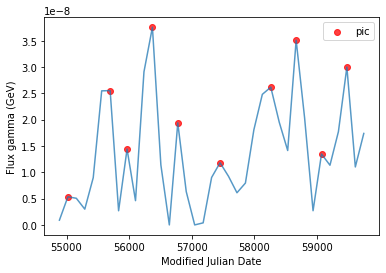

In [10]:
dataframe=pd.read_csv(dataOFF[78],index_col=[0])
dataframe.columns=['MJD','Flux','Delta Flux','Photon Index','Delta Index','TS','fratio']

time=np.array(dataframe['MJD'])
array=np.array(dataframe['Flux'])
delta_flux=np.array(dataframe['Delta Flux'])


indices = find_peaks(array)

#Formatting indices array - last element is a tuple
indices=np.delete(indices,-1)

#Geetting peak magnitudes and corresponding times
y=[array[j] for j in indices]
x=[time[j] for j in indices]



#Formatting arrays
x=np.hstack(x)
y=np.hstack(y)


plt.plot(time,array,alpha=0.75)
plt.scatter(x,y,color='r',alpha=0.75, label='pic')
plt.xlabel('Modified Julian Date')
plt.ylabel('Flux gamma (GeV)')
plt.legend()

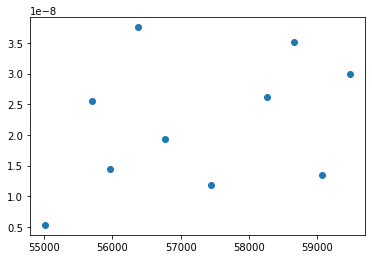

In [11]:
plt.scatter(x,y)

In [12]:

def peak_study(array,time,delta_array):    

    #<Getting indices of  peaks
    indices = find_peaks(array)
    #Formatting indices array - last element is a tuple
    indices=np.delete(indices,-1)
    
    #Scaling the lightcurve to the lightcurve
    scaler = MinMaxScaler()
    array2=array.reshape(-1,1)
    scaler.fit(array2)
    array2=scaler.transform(array2)
    
    #Scaling the MJD 
    scaler = MinMaxScaler()
    time2=time.reshape(-1,1)
    scaler.fit(time2)
    time2=scaler.transform(time2) 
    



    #Geetting peak magnitudes and corresponding times
    y=[array2[j] for j in indices]
    x=[time2[j] for j in indices]
    
    y_err=[delta_array[j] for j in indices]
 
    #Formatting arrays
    x=np.hstack(x)
    y=np.hstack(y)
    y_err=np.hstack(y_err)
    
    
#   Error randomization code
#     arr=[1,-1]
#     for i in range(len(y)):
#         if np.isnan(y[i])==False:
#             error=y_err[i]
#             choice=np.random.choice(arr,1)
#             if choice ==1:
#                 y[i]=y[i]+error
#             if choice==-1:
#                 y[i]=y[i]-error

    std_peaks=np.std(y)

    #Formatting - get all indices within array - not fiirst value in array
    indices=indices[0]
    
    #Getting baseline feature
    baseline=np.delete(array2,indices)
    baseline=np.mean(baseline) 
    
    # Getting feature : Biggest peak to smallest peak magnitude difference - scaled to array
    mini=np.argmin(y)
    idx_min=indices[mini]
    minimum=array2[idx_min]
    maxi=np.argmax(y)
    idx_max=indices[maxi]
    maximum=array2[idx_max]
    min_max_peak=maximum-minimum
    

    #Unused array
    peak_magnitudes=y
    
    #One to second biggest peak features
    copy_flux=array2.copy()
    copy_time=time2.copy()
    a=np.argmax(copy_flux)
    ymax1=copy_flux[a]
    tmax1=time2[a]
    copy_flux[a]=0
    a=np.argmax(copy_flux)
    ymax2=copy_flux[a]
    tmax2=copy_time[a]
    one_to_second_flux=float(abs(ymax1-ymax2))
    one_to_second_time=float(abs(tmax1-tmax2))
    
    #Number of peaks in lightcurve feature
    nb_peaks=len(y)
    
    delta_energy_arr=[]
    delta_time_arr=[]
    for i in range(nb_peaks-1):
        
        delta = x[i+1]-x[i]
        delta_energy=abs(y[i+1]-y[i])
        delta_time_arr.append(delta)
        delta_energy_arr.append(delta_energy)
        
    #Getting other peak features from scaled peaks
    delay_std=np.std(delta_time_arr)
    NG_diff_mean_peaks=np.mean(delta_energy_arr)
    peaks_time_delay=np.mean(delta_time_arr)
    
    max_time_delay=max(delta_time_arr)
    min_time_delay=min(delta_time_arr)
    max_diff_mean_peaks=float(max(y)-np.mean(y))
    min_diff_mean_peaks=float(min(y)-np.mean(y))
    var_peaks=np.var(y)
    std=np.std(array2)
    mean_peaks=np.mean(y)
    
    #Getting unscaled features for lightcurve
    mean_arr=np.mean(array2)
    maxi=max(array)
    mini=min(array)
    amplitude=max(array)-min(array)
    
        
    return x,y,time2,array2,nb_peaks,peak_magnitudes,peaks_time_delay,std_peaks,mean_peaks,NG_diff_mean_peaks,max_diff_mean_peaks,min_diff_mean_peaks,mean_arr,maxi,mini,amplitude,std,one_to_second_flux,one_to_second_time,min_max_peak,max_time_delay,min_time_delay,delay_std,baseline


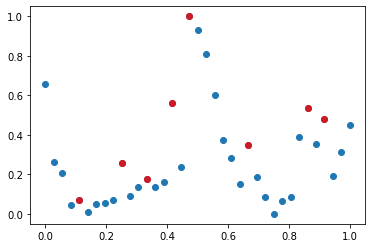

In [13]:
#plot the new array2[0] time2[0]
dataframe=pd.read_csv(dataOFF[0],index_col=[0])
dataframe.columns=['MJD','Flux','Delta Flux','Photon Index','Delta Index','TS','fratio']

mjd=np.array(dataframe['MJD'])
flux=np.array(dataframe['Flux'])
delta_flux=np.array(dataframe['Delta Flux'])
x,y,time2,array2,nb_peaks,peak_magnitudes,peaks_time_delay,std_peaks,mean_peaks,NG_diff_mean_peaks,max_diff_mean_peaks,min_diff_mean_peaks,mean_arr,maxi,mini,amplitude,std,one_to_second_flux,one_to_second_time,min_max_peak,max_time_delay,min_time_delay,delay_std,baseline=peak_study(flux,mjd,delta_flux)


plt.scatter(time2,array2)
plt.scatter(x,y,color='r',alpha=0.75)

In [14]:
#Machine learning section and testing

In [15]:
#Calculating features and putting them in arrays for each class

lgON=len(dataON)
lgOFF=len(dataOFF)
lg=lgON+lgOFF

Labels=[]



nb_peaks_arr_flux =[]
peak_magnitudes_arr_flux =[]
peaks_time_delay_arr_flux =[]
std_peaks_arr_flux =[]
mean_peaks_arr_flux =[]
NG_diff_mean_peaks_arr_flux =[]
max_diff_mean_peaks_arr_flux =[]
min_diff_mean_peaks_arr_flux =[]
mean_arr_flux=[]
max_arr_flux=[]
min_arr_flux=[]
amplitude_flux=[]
std_flux=[]
one_two_flux=[]
one_two_time=[]
min_max=[]
min_deltaT=[]
max_deltaT=[]
deltaT_std=[]
BASEline=[]


for i in range(len(dataOFF)):
    
    dataframe=pd.read_csv(dataOFF[i],index_col=[0])
    dataframe.columns=['MJD','Flux','Delta Flux','Photon Index','Delta Index','TS','fratio']
    
    mjd=np.array(dataframe['MJD'])
    flux=np.array(dataframe['Flux'])
    delta_flux=np.array(dataframe['Delta Flux'])
    
    #Getting features for the corresponding source
    x,y,time2,array2,nb_peaks,peak_magnitudes,peaks_time_delay,std_peaks,mean_peaks,NG_diff_mean_peaks,max_diff_mean_peaks,min_diff_mean_peaks,mean_arr,maxi,mini,amplitude,std,one_to_second_flux,one_to_second_time,min_max_peak,max_time_delay,min_time_delay,delay_std,baseline=peak_study(flux,mjd,delta_flux)
                                                                                                                                           
    nb_peaks_arr_flux.append(nb_peaks)
    peak_magnitudes_arr_flux.append(peak_magnitudes)
    peaks_time_delay_arr_flux.append(peaks_time_delay)
    std_peaks_arr_flux.append(std_peaks)
    mean_peaks_arr_flux.append(mean_peaks)

    NG_diff_mean_peaks_arr_flux.append(NG_diff_mean_peaks)
    max_diff_mean_peaks_arr_flux.append(max_diff_mean_peaks)
    min_diff_mean_peaks_arr_flux.append(min_diff_mean_peaks)
    mean_arr_flux.append(mean_arr)
    max_arr_flux.append(maxi)
    min_arr_flux.append(mini)
    amplitude_flux.append(amplitude)
    std_flux.append(std)
    one_two_flux.append(one_to_second_flux)
    one_two_time.append(one_to_second_time)
    min_max.append(min_max_peak)
    min_deltaT.append(min_time_delay)
    max_deltaT.append(max_time_delay)
    deltaT_std.append(delay_std)
    BASEline.append(baseline)

for i in range(len(dataON)):
    
    dataframe=pd.read_csv(dataON[i],index_col=[0])
    dataframe.columns=['MJD','Flux','Delta Flux','Photon Index','Delta Index','TS','fratio']
    mjd=np.array(dataframe['MJD'])
    flux=np.array(dataframe['Flux'])
    delta_flux=np.array(dataframe['Delta Flux'])
    
    #Getting features for the corresponding source
    x,y,time2,array2,nb_peaks,peak_magnitudes,peaks_time_delay,std_peaks,mean_peaks,NG_diff_mean_peaks,max_diff_mean_peaks,min_diff_mean_peaks,mean_arr,maxi,mini,amplitude,std,one_to_second_flux,one_to_second_time,min_max_peak,max_time_delay,min_time_delay,delay_std,baseline=peak_study(flux,mjd,delta_flux)
    
    nb_peaks_arr_flux.append(nb_peaks)
    peak_magnitudes_arr_flux.append(peak_magnitudes)
    peaks_time_delay_arr_flux.append(peaks_time_delay)
    std_peaks_arr_flux.append(std_peaks)
    mean_peaks_arr_flux.append(mean_peaks)
    NG_diff_mean_peaks_arr_flux.append(NG_diff_mean_peaks)
    max_diff_mean_peaks_arr_flux.append(max_diff_mean_peaks)
    min_diff_mean_peaks_arr_flux.append(min_diff_mean_peaks)
    mean_arr_flux.append(mean_arr)
    max_arr_flux.append(maxi)
    min_arr_flux.append(mini)
    amplitude_flux.append(amplitude)
    std_flux.append(std)
    one_two_flux.append(one_to_second_flux)
    one_two_time.append(one_to_second_time)
    min_max.append(min_max_peak)
    min_deltaT.append(min_time_delay)
    max_deltaT.append(max_time_delay)
    deltaT_std.append(delay_std)
    BASEline.append(baseline)

#Creating labels
for i in range(lgOFF):
    
    Labels.append(int(0))
    
for i in range(lgON):
    Labels.append(int(1))
    
# Labels=np.array(np.random.permutation(Labels))
# peaks_time_delay_arr_flux=np.array(np.random.permutation(peaks_time_delay_arr_flux))

In [16]:
# #Filling data matrix with features

# nbfeatures=12

# data_matrix=np.zeros((nbfeatures,lg))

# # data_matrix[0]=nb_peaks_arr_flux
# data_matrix[0]=peaks_time_delay_arr_flux

# data_matrix[1]=std_peaks_arr_flux

# data_matrix[2]=deltaT_std

# data_matrix[3]=mean_peaks_arr_flux
# data_matrix[4]=min_max
# data_matrix[5]=std_flux

# data_matrix[6]=mean_arr_flux

# data_matrix[7]=one_two_flux
# data_matrix[8]=one_two_time

# data_matrix[9]=NG_diff_mean_peaks_arr_flux
# data_matrix[10]=max_diff_mean_peaks_arr_flux
# data_matrix[11]=min_diff_mean_peaks_arr_flux

# data_matrix=data_matrix.reshape((lg,nbfeatures))

In [17]:
# Filling data matrix with features

nbfeatures=9

data_matrix=np.zeros((nbfeatures,lg))


data_matrix[0]=mean_peaks_arr_flux
data_matrix[1]=min_max
data_matrix[2]=std_flux

data_matrix[3]=mean_arr_flux

data_matrix[4]=one_two_flux
data_matrix[5]=one_two_time

data_matrix[6]=NG_diff_mean_peaks_arr_flux
data_matrix[7]=max_diff_mean_peaks_arr_flux
data_matrix[8]=min_diff_mean_peaks_arr_flux

data_matrix=data_matrix.reshape((lg,nbfeatures))

In [18]:
#Filling data matrix with features

nbfeatures=7

data_matrix=np.zeros((nbfeatures,lg))


# data_matrix[6]=mean_peaks_arr_flux

data_matrix[6]=std_flux

data_matrix[0]=mean_arr_flux

# data_matrix[0]=one_two_flux
data_matrix[1]=one_two_time

data_matrix[2]=NG_diff_mean_peaks_arr_flux
data_matrix[3]=max_diff_mean_peaks_arr_flux
data_matrix[4]=min_diff_mean_peaks_arr_flux
data_matrix[5]=min_max
# data_matrix[6]=mean_arr_flux

data_matrix=data_matrix.reshape((lg,nbfeatures))

In [19]:
#Filling data matrix with features

nbfeatures=12

data_matrix=np.zeros((nbfeatures,lg))






data_matrix[11]=mean_arr_flux
data_matrix[1]=one_two_time
data_matrix[2]=NG_diff_mean_peaks_arr_flux
data_matrix[3]=max_diff_mean_peaks_arr_flux
data_matrix[4]=min_diff_mean_peaks_arr_flux
data_matrix[5]=min_max
data_matrix[6]=std_flux
data_matrix[7]=one_two_flux
data_matrix[8]=mean_peaks_arr_flux
data_matrix[9]=deltaT_std
data_matrix[10]=std_peaks_arr_flux
data_matrix[0]=peaks_time_delay_arr_flux

# data_matrix[6]=mean_arr_flux

data_matrix=data_matrix.reshape((lg,nbfeatures))

In [257]:
nbfeatures=12

data_matrix=np.zeros((nbfeatures,lg))
data_matrix[0]=peaks_time_delay_arr_flux

data_matrix[1]=std_peaks_arr_flux

data_matrix[2]=deltaT_std
data_matrix=data_matrix.reshape((lg,nbfeatures))

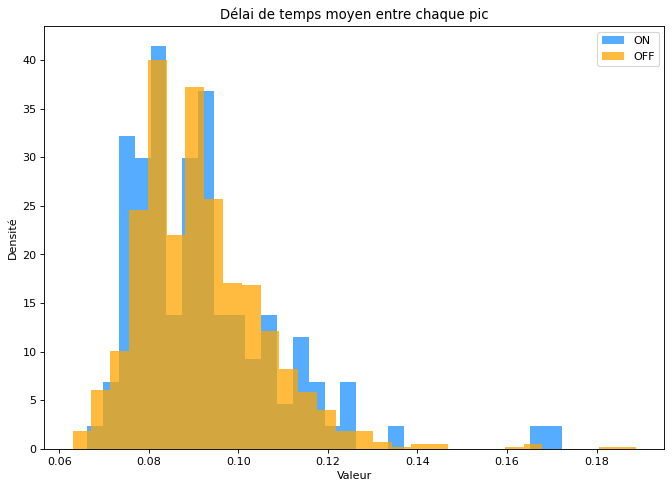

In [20]:
kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})

plt.figure(figsize=(10,7), dpi= 80)
plt.hist(peaks_time_delay_arr_flux[lgOFF:], color="dodgerblue", label="ON",density=True,alpha=0.75,bins=30)
plt.hist(peaks_time_delay_arr_flux[:lgOFF], color="orange", label="OFF",density=True,alpha=0.75,bins=30)
plt.title("Délai de temps moyen entre chaque pic")
plt.ylabel('Densité')
plt.xlabel('Valeur')
plt.legend();
#interesting

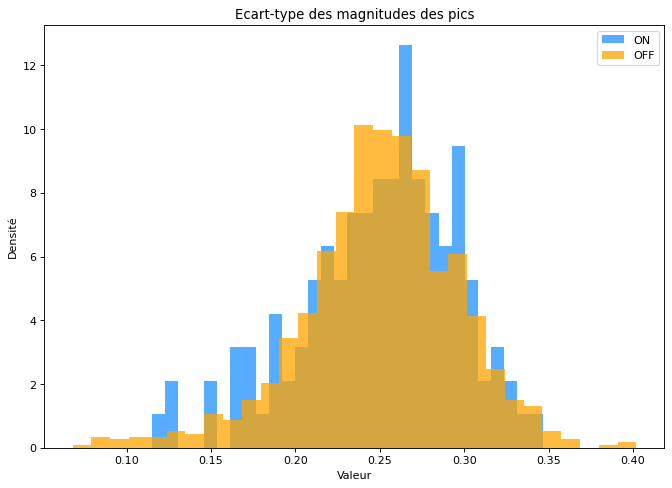

In [21]:

plt.figure(figsize=(10,7), dpi= 80)
plt.hist(std_peaks_arr_flux[lgOFF:], color="dodgerblue", label="ON",density=True,alpha=0.75,bins=30)
plt.hist(std_peaks_arr_flux[:lgOFF], color="orange", label="OFF",density=True,alpha=0.75,bins=30)
plt.title("Ecart-type des magnitudes des pics")
plt.ylabel('Densité')
plt.xlabel('Valeur')
plt.legend();
# Measure of how much the magnitude of the peaks varies

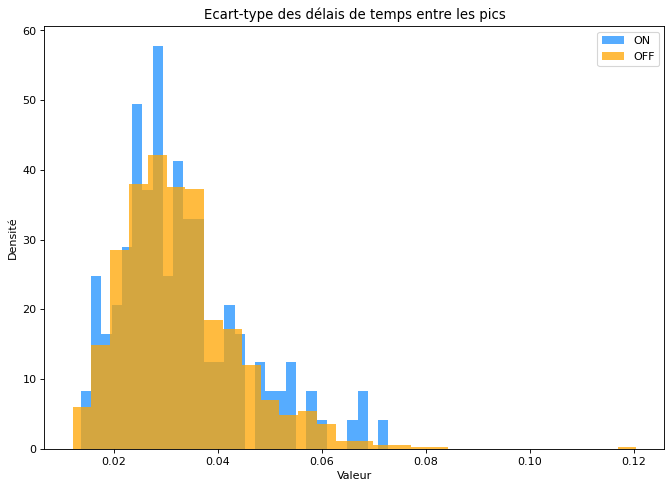

In [22]:

plt.figure(figsize=(10,7), dpi= 80)
plt.hist(deltaT_std[lgOFF:], color="dodgerblue", label="ON",density=True,alpha=0.75,bins=30)
plt.hist(deltaT_std[:lgOFF], color="orange", label="OFF",density=True,alpha=0.75,bins=30)
plt.title("Ecart-type des délais de temps entre les pics")
plt.ylabel('Densité')
plt.xlabel('Valeur')
plt.legend();

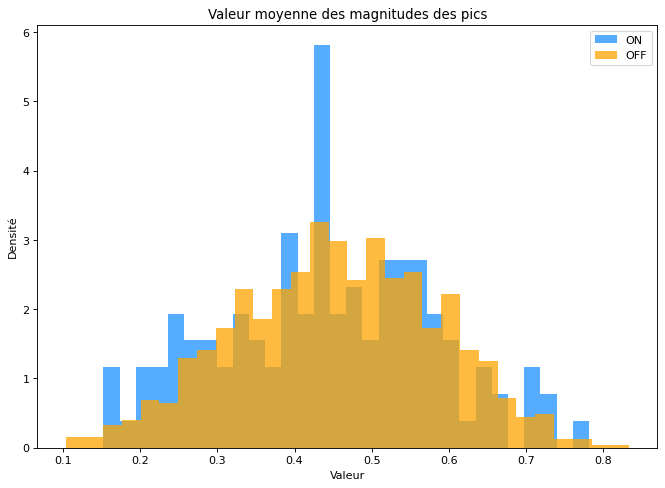

In [23]:
kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})

plt.figure(figsize=(10,7), dpi= 80)
plt.hist(mean_peaks_arr_flux[lgOFF:], color="dodgerblue", label="ON",density=True,alpha=0.75,bins=30)
plt.hist(mean_peaks_arr_flux[:lgOFF], color="orange", label="OFF",density=True,alpha=0.75,bins=30)
plt.title("Valeur moyenne des magnitudes des pics")
plt.ylabel('Densité')
plt.xlabel('Valeur')
plt.legend();
#Interesting

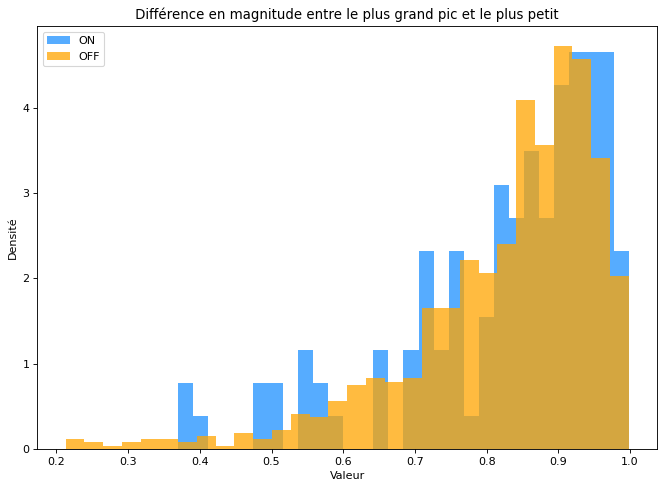

In [24]:
kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})
min_max=np.hstack(min_max)
plt.figure(figsize=(10,7), dpi= 80)
plt.hist(min_max[lgOFF:], color="dodgerblue", label="ON",density=True,alpha=0.75,bins=30)
plt.hist(min_max[:lgOFF], color="orange", label="OFF",density=True,alpha=0.75,bins=30)
plt.title(" Différence en magnitude entre le plus grand pic et le plus petit ")
plt.ylabel('Densité')
plt.xlabel('Valeur')
plt.legend();

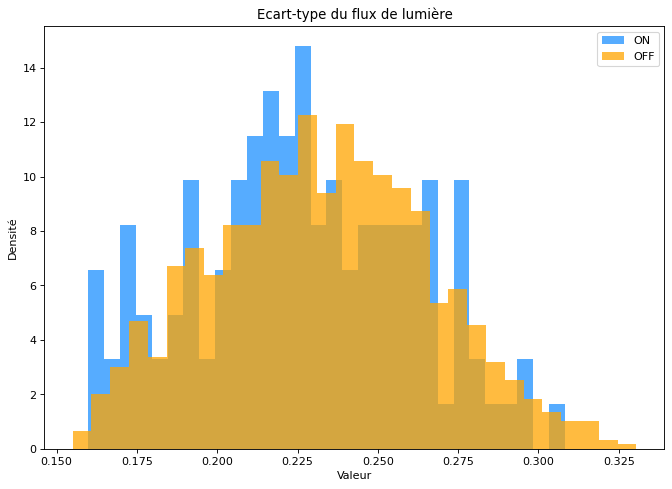

In [25]:
kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})

plt.figure(figsize=(10,7), dpi= 80)
plt.hist(std_flux[lgOFF:], color="dodgerblue", label="ON",density=True,alpha=0.75,bins=30)
plt.hist(std_flux[:lgOFF], color="orange", label="OFF",density=True,alpha=0.75,bins=30)
plt.title("Ecart-type du flux de lumière")
plt.ylabel('Densité')
plt.xlabel('Valeur')
plt.legend();

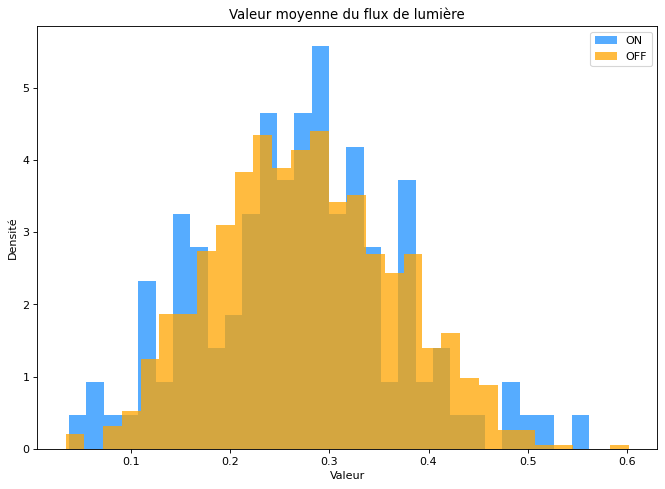

In [26]:


plt.figure(figsize=(10,7), dpi= 80)
plt.hist(mean_arr_flux[lgOFF:], color="dodgerblue", label="ON",density=True,alpha=0.75,bins=30)
plt.hist(mean_arr_flux[:lgOFF], color="orange", label="OFF",density=True,alpha=0.75,bins=30)
plt.title("Valeur moyenne du flux de lumière")
plt.ylabel('Densité')
plt.xlabel('Valeur')
plt.legend();

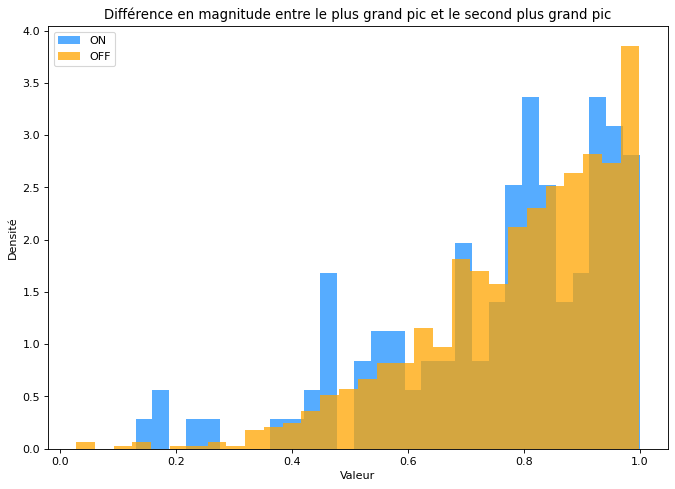

In [27]:
one_two_flux=np.hstack(one_two_flux)
plt.figure(figsize=(10,7), dpi= 80)
plt.hist(one_two_flux[lgOFF:], color="dodgerblue", label="ON",density=True,alpha=0.75,bins=30)
plt.hist(one_two_flux[:lgOFF], color="orange", label="OFF",density=True,alpha=0.75,bins=30)
plt.title("Différence en magnitude entre le plus grand pic et le second plus grand pic")
plt.ylabel('Densité')
plt.xlabel('Valeur')
plt.legend();


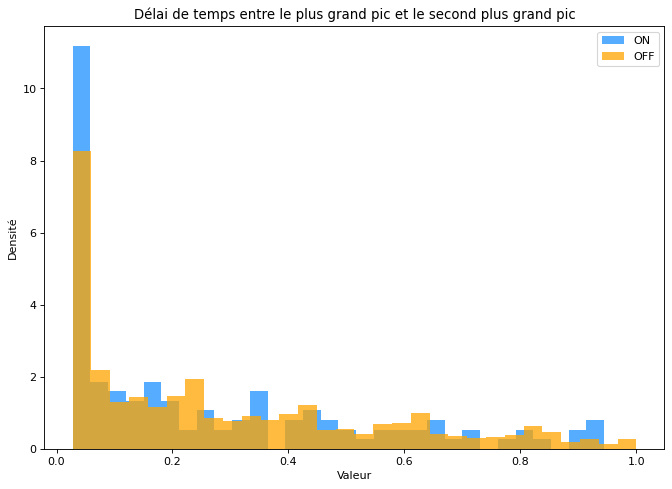

In [28]:

one_two_time=np.hstack(one_two_time)
plt.figure(figsize=(10,7), dpi= 80)
plt.hist(one_two_time[lgOFF:], color="dodgerblue", label="ON",density=True,alpha=0.75,bins=30)
plt.hist(one_two_time[:lgOFF], color="orange", label="OFF",density=True,alpha=0.75,bins=30)
plt.title("Délai de temps entre le plus grand pic et le second plus grand pic")
plt.ylabel('Densité')
plt.xlabel('Valeur')
plt.legend();

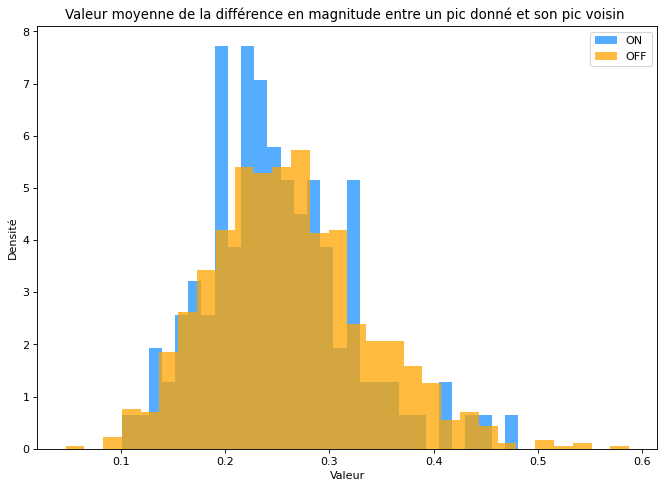

In [29]:
plt.figure(figsize=(10,7), dpi= 80)
plt.hist(NG_diff_mean_peaks_arr_flux[lgOFF:], color="dodgerblue", label="ON",density=True,alpha=0.75,bins=30)
plt.hist(NG_diff_mean_peaks_arr_flux[:lgOFF], color="orange", label="OFF",density=True,alpha=0.75,bins=30)
plt.title("Valeur moyenne de la différence en magnitude entre un pic donné et son pic voisin ")
plt.ylabel('Densité')
plt.xlabel('Valeur')
plt.legend();

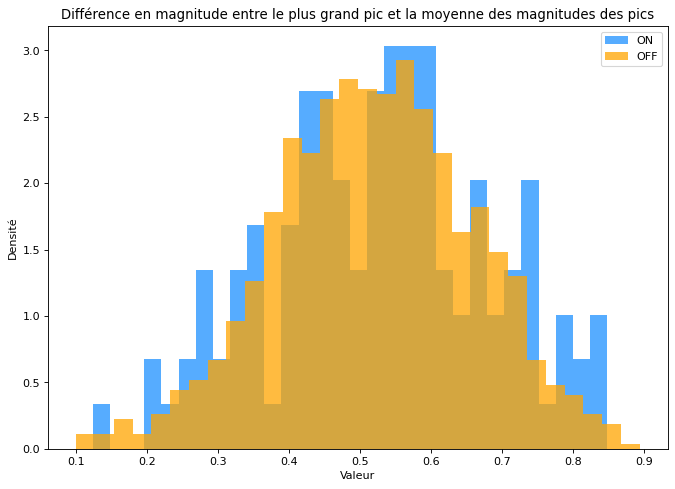

In [30]:
max_diff_mean_peaks_arr_flux=np.hstack(max_diff_mean_peaks_arr_flux)
plt.figure(figsize=(10,7), dpi= 80)
plt.hist(max_diff_mean_peaks_arr_flux[lgOFF:], color="dodgerblue", label="ON",density=True,alpha=0.75,bins=30)
plt.hist(max_diff_mean_peaks_arr_flux[:lgOFF], color="orange", label="OFF",density=True,alpha=0.75,bins=30)
plt.title("Différence en magnitude entre le plus grand pic et la moyenne des magnitudes des pics")
plt.ylabel('Densité')
plt.xlabel('Valeur')
plt.legend();

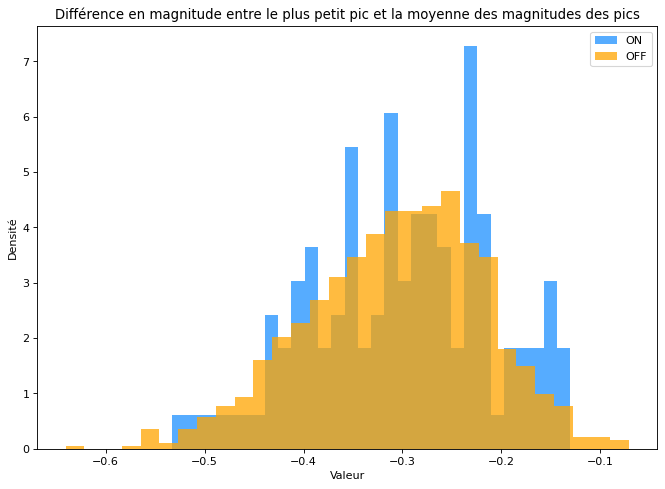

In [31]:
min_diff_mean_peaks_arr_flux=np.hstack(min_diff_mean_peaks_arr_flux)
plt.figure(figsize=(10,7), dpi= 80)
plt.hist(min_diff_mean_peaks_arr_flux[lgOFF:], color="dodgerblue", label="ON",density=True,alpha=0.75,bins=30)
plt.hist(min_diff_mean_peaks_arr_flux[:lgOFF], color="orange", label="OFF",density=True,alpha=0.75,bins=30)
plt.ylabel('Densité')
plt.xlabel('Valeur')
plt.title("Différence en magnitude entre le plus petit pic et la moyenne des magnitudes des pics")
plt.legend();

In [32]:

nbfeatures=12

data_matrix=np.zeros((nbfeatures,lg))
data_matrix[0]=peaks_time_delay_arr_flux
data_matrix[1]=mean_arr_flux
data_matrix[2]=one_two_time
data_matrix[3]=NG_diff_mean_peaks_arr_flux
data_matrix[4]=max_diff_mean_peaks_arr_flux
data_matrix[5]=min_diff_mean_peaks_arr_flux
data_matrix[6]=min_max
data_matrix[7]=std_flux
data_matrix[8]=one_two_flux
data_matrix[9]=mean_peaks_arr_flux
data_matrix[10]=deltaT_std
data_matrix[11]=std_peaks_arr_flux
data_matrix=data_matrix.reshape((lg,nbfeatures))




# nbfeatures=12

# data_matrix=np.zeros((nbfeatures,lg))




















# data_matrix=data_matrix.reshape((lg,nbfeatures))

In [222]:
nbfeatures=2

data_matrix=np.zeros((nbfeatures,lg))
data_matrix[0]=peaks_time_delay_arr_flux
data_matrix[1]=deltaT_std

data_matrix=data_matrix.reshape((lg,nbfeatures))

In [33]:
from sklearn.metrics import precision_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.tree import export_graphviz
# import mglearn
import graphviz
fscore=[]
prec_score=[]

#Class weights values 
lgON=len(dataON)
lgOFF=len(dataOFF)
lg=lgON+lgOFF
print(lgOFF,lgON)
weight_for_0 = (1 / lgOFF) * (lg / 2.0)
weight_for_1 = (1 / lgON) * (lg / 2.0)
print(weight_for_0,weight_for_1)
class_weight = {0: weight_for_0, 1: weight_for_1}

iterations=1
#print(Labels)
#random.seed(0)

# data_matrix=np.random.permutation(data_matrix)
#print(Labels)

#for i in range(10,11):
# for i in range(iterations):
i=3
x_train, x_test, y_train, y_test = train_test_split(data_matrix, Labels, test_size=0.6, random_state=i)

#print(y_train)

model = RandomForestClassifier(n_estimators=500,
                               random_state=i,
                               class_weight = class_weight,max_features=None)

    
model.fit(x_train, y_train)
prediction= model.predict(x_test)
f1= f1_score(y_test,prediction)
score=precision_score(y_test,prediction)
fscore.append(f1)
prec_score.append(score)

    
print("F1 score: ",np.mean(fscore))
print("Precision score:",np.mean(prec_score))
# print(y_test-prediction)


1019 123
0.5603532875368007 4.642276422764228
F1 score:  0.3018867924528301
Precision score: 0.41025641025641024


''

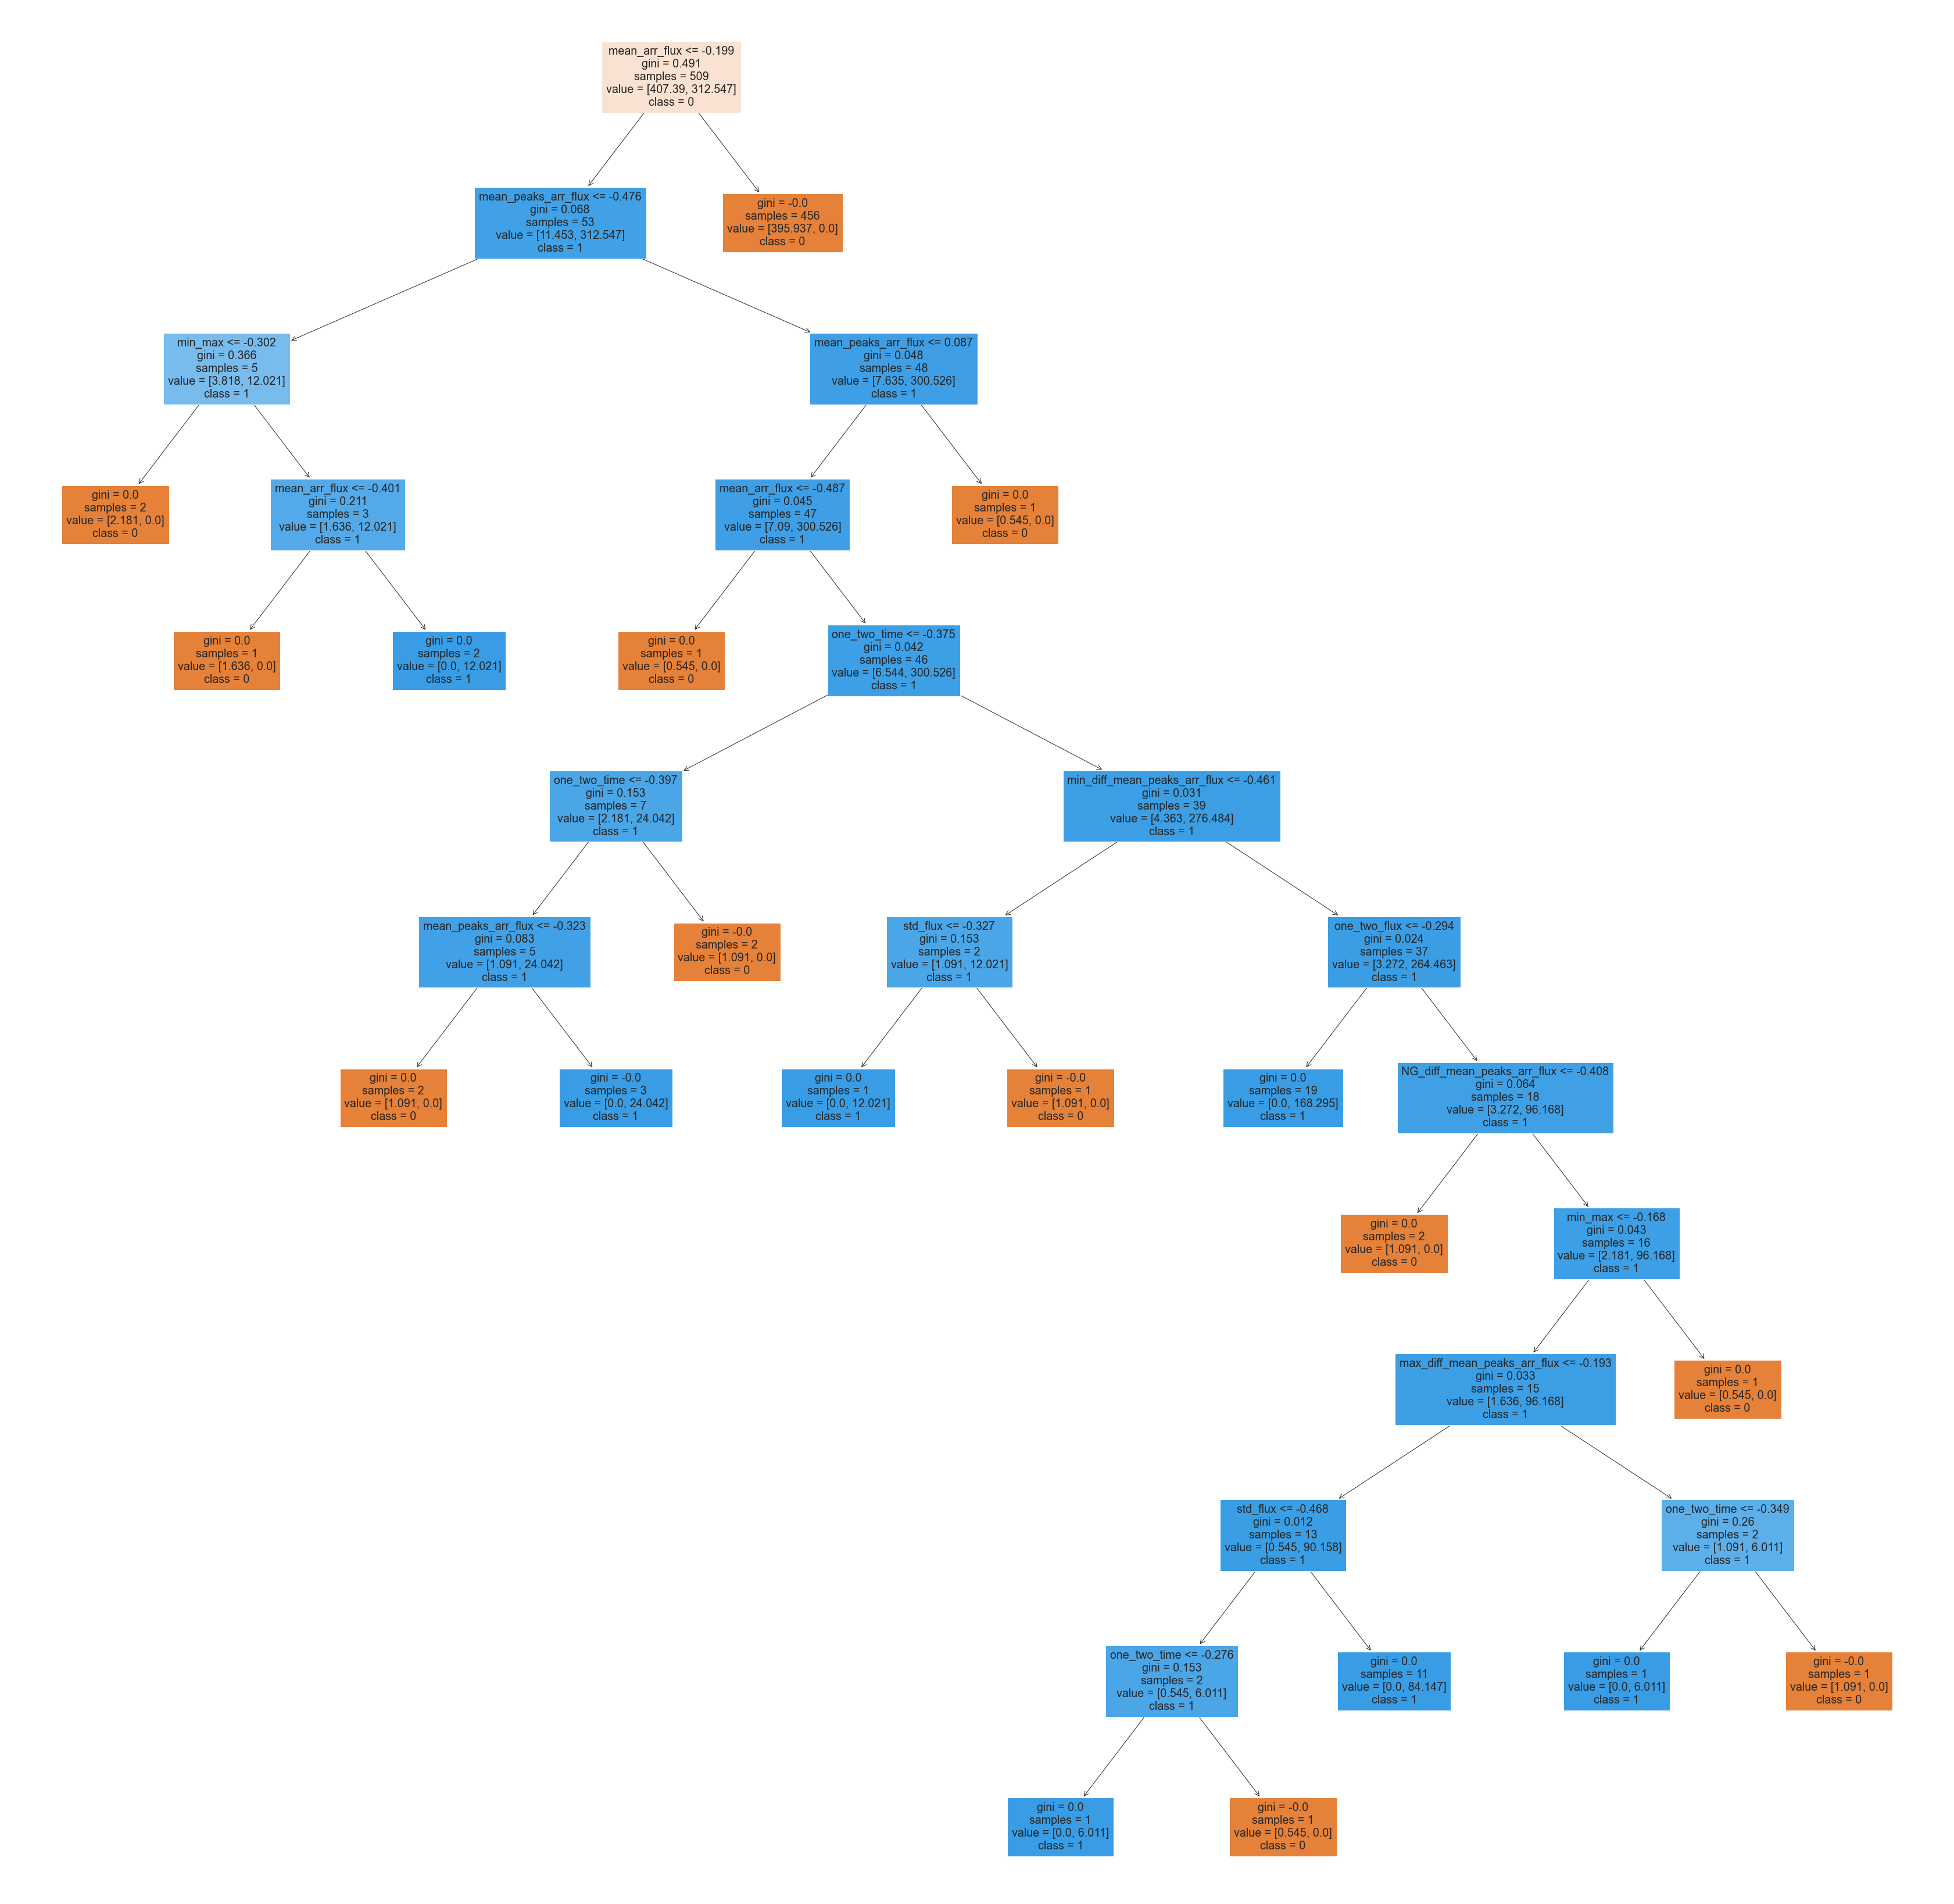

In [318]:

from sklearn import tree
class_Names=['0','1']
features_names=['mean_peaks_arr_flux','min_max','std_flux','mean_arr_flux',
                'one_two_flux','one_two_time','NG_diff_mean_peaks_arr_flux',
                'max_diff_mean_peaks_arr_flux','min_diff_mean_peaks_arr_flux']



from sklearn.tree import plot_tree

fig = plt.figure(figsize=(60, 60))
plot_tree(model.estimators_[1], 
          feature_names=features_names,
          class_names=class_Names, 
          filled=True, impurity=True, 
          rounded=False)
;

In [669]:
#Filling data matrix with features

nbfeatures=7

data_matrix=np.zeros((nbfeatures,lg))


# data_matrix[6]=mean_peaks_arr_flux

data_matrix[6]=std_flux

data_matrix[0]=mean_arr_flux

# data_matrix[0]=one_two_flux
data_matrix[1]=one_two_time

data_matrix[2]=NG_diff_mean_peaks_arr_flux
data_matrix[3]=max_diff_mean_peaks_arr_flux
data_matrix[4]=min_diff_mean_peaks_arr_flux
data_matrix[5]=min_max
# data_matrix[6]=mean_arr_flux

data_matrix=data_matrix.reshape((lg,nbfeatures))

''

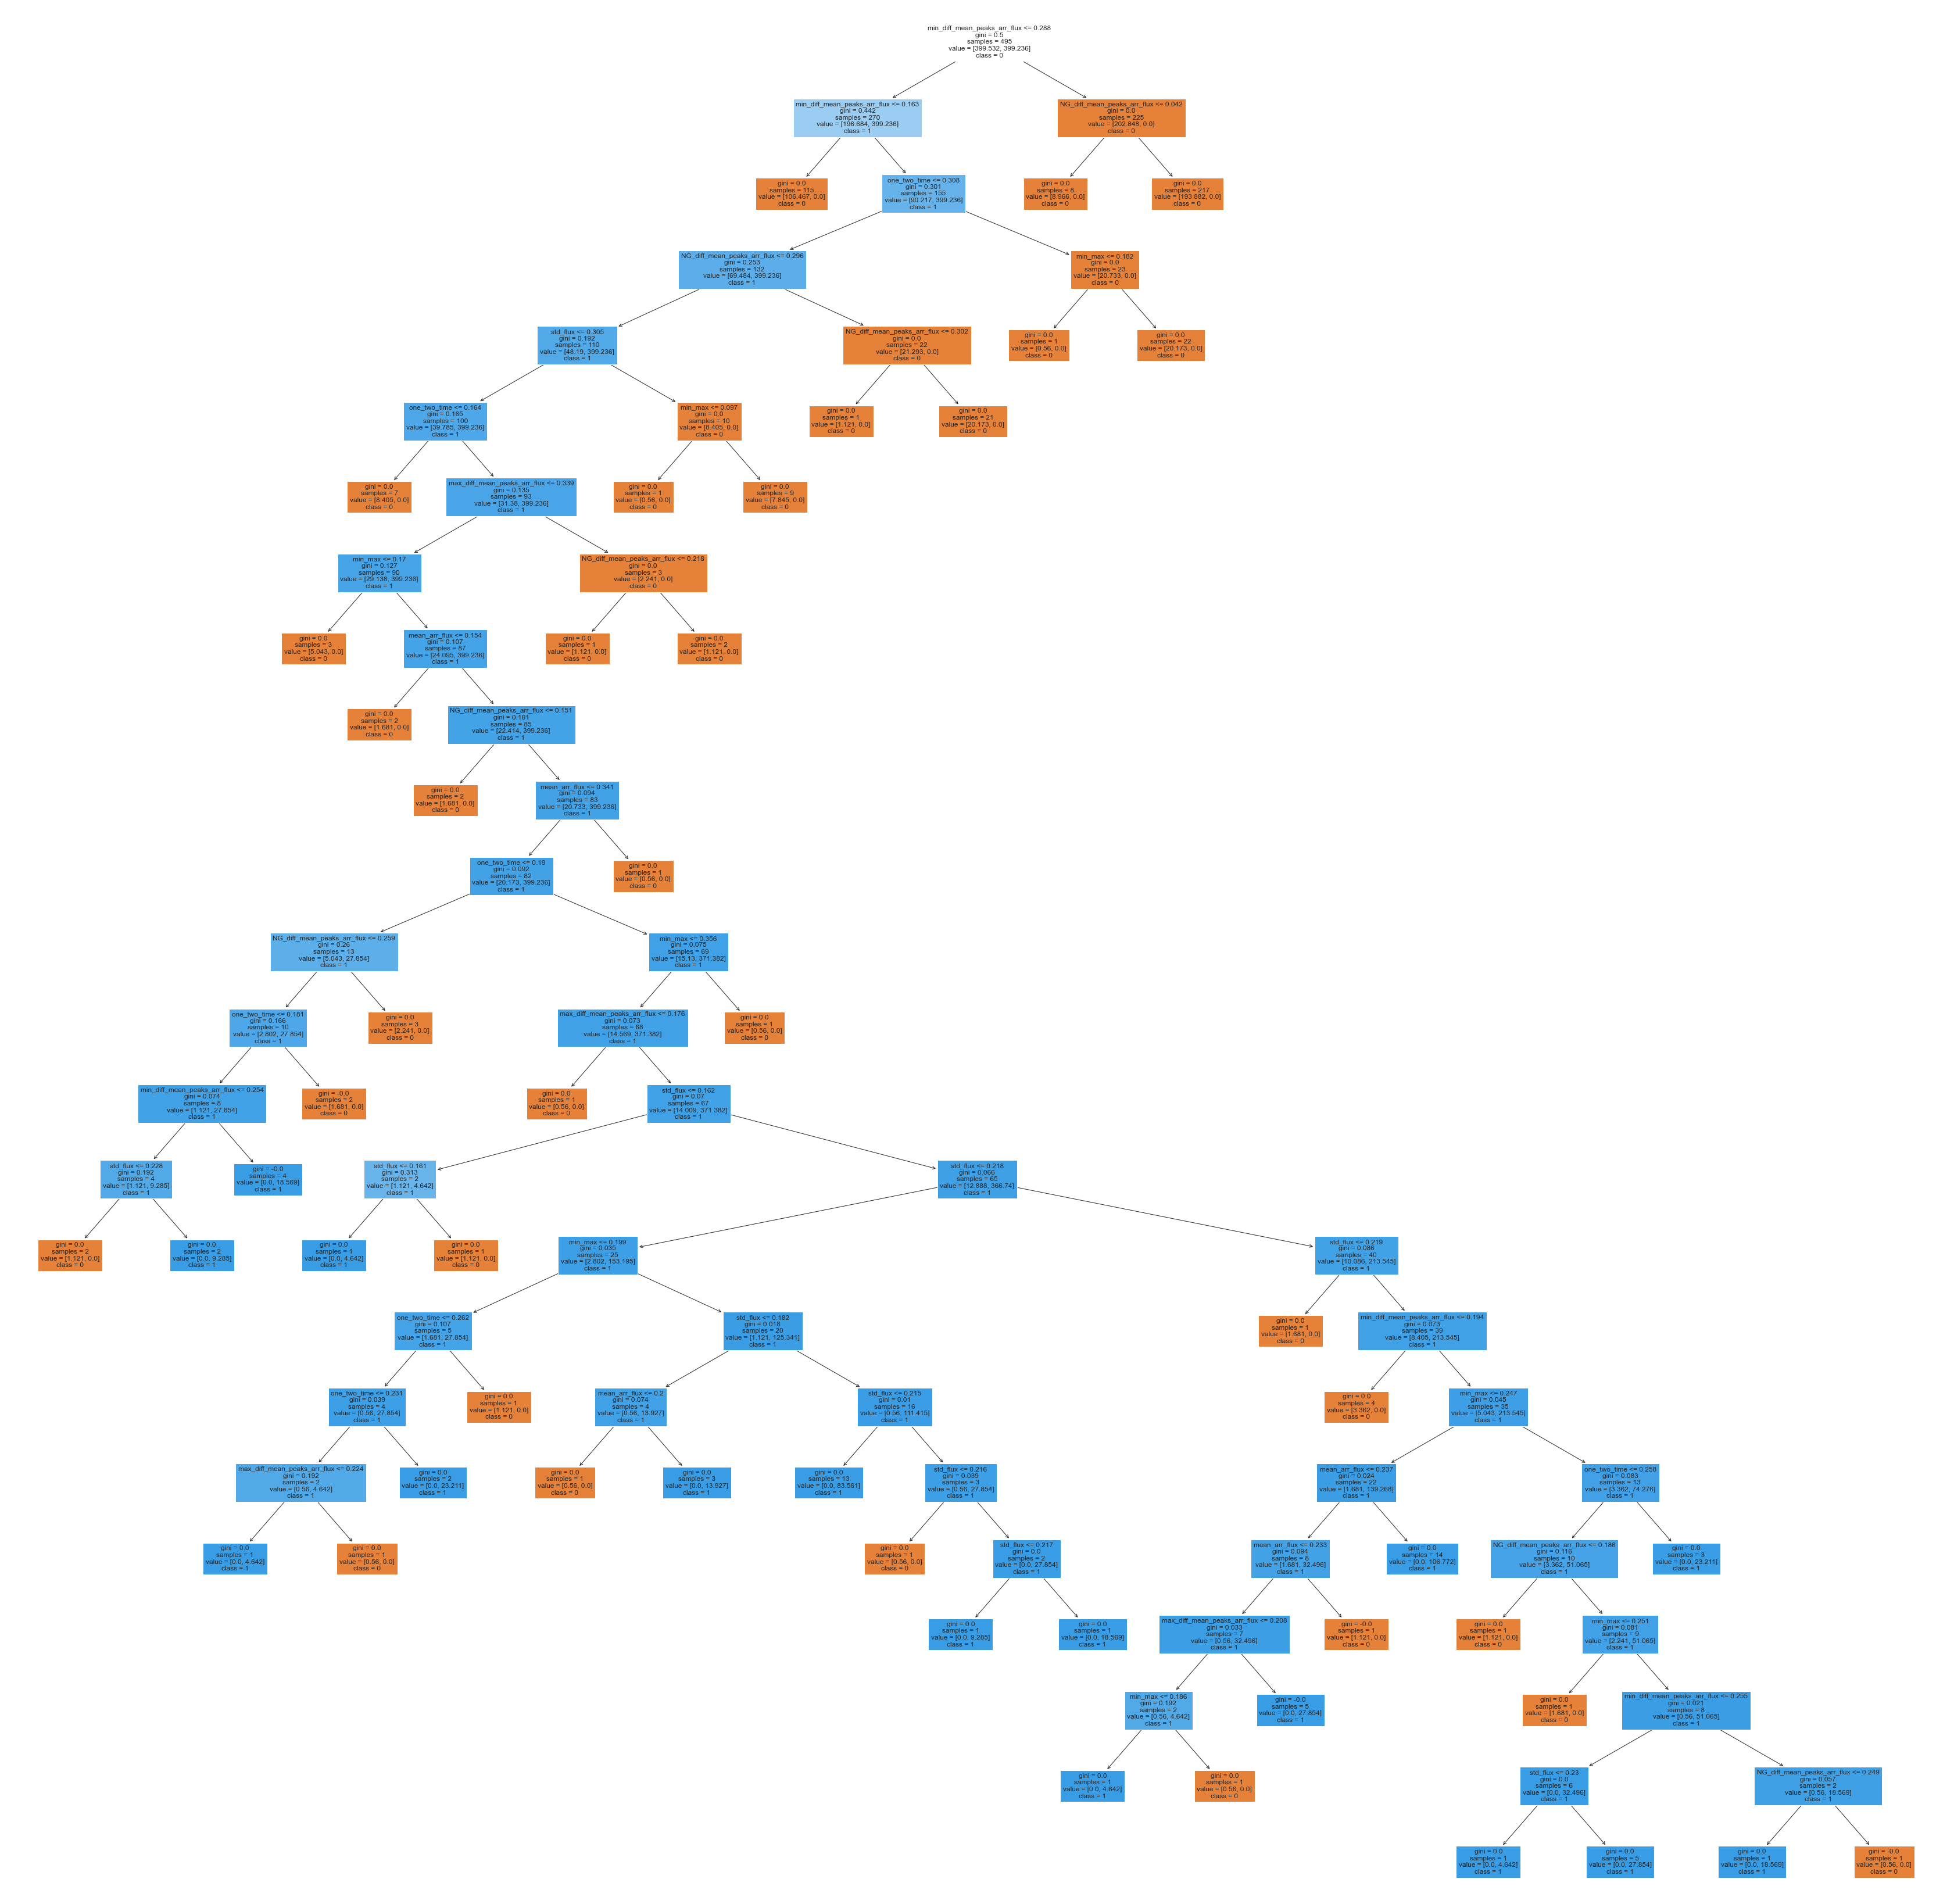

In [80]:

from sklearn import tree
class_Names=['0','1']
features_names=['mean_arr_flux','one_two_time','NG_diff_mean_peaks_arr_flux',
                'max_diff_mean_peaks_arr_flux','min_diff_mean_peaks_arr_flux','std_flux' ,'min_max']



from sklearn.tree import plot_tree

fig = plt.figure(figsize=(60, 60))
plot_tree(model.estimators_[1], 
          feature_names=features_names,
          class_names=class_Names, 
          filled=True, impurity=True, 
          rounded=False)
;

In [646]:
from dtreeviz.trees import dtreeviz


viz = dtreeviz(model.estimators_[0], x_test, y_test,
               target_name=1,
               feature_names=features_names,
               class_names=class_Names,
               title="0th decision tree")

viz.save("decision_tree_wine.svg")



AttributeError: 'list' object has no attribute 'dtype'

In [580]:
# print(len(prediction))
# print(prediction-y_test)


#Printing REAL LABELS vs PREDICTED LABELS

#REAL LABELS
#print("Real Labels: ")
#print(np.array(y_test))
#PREDICTED LABELS
#print("Predicted Labels: ")
#print(prediction)

In [37]:
#Score density distribution

dens = model.predict_proba(x_test)

#print(dens)

OFFF=[]
ONN=[]
idx_ON=[]
idx_OFF=[]
for i in range(len(y_test)):
    
    if y_test[i]==1:
        idx_ON.append(i)
    if y_test[i]==0:
        idx_OFF.append(i)        

#print()
        
        # for i in range(len(idx_ON)):
    
#     a=idx_ON[i]
#     OFFF.append(dens[a][0])
#     ONN.append(dens[a][1])
         
for i in range(len(dens)):
        
        OFFF.append(dens[i][0])
        ONN.append(dens[i][1])
        
ONN_true=[ONN[j] for j in idx_ON]
OFF_true=[ONN[j] for j in idx_OFF]

print(ONN_true)


[0.584, 0.838, 0.016, 0.026, 0.142, 0.012, 0.082, 0.918, 0.296, 0.316, 0.508, 0.078, 0.482, 0.47, 0.21, 0.454, 0.442, 0.236, 0.012, 0.436, 0.044, 0.414, 0.762, 0.854, 0.132, 0.556, 0.09, 0.336, 0.01, 0.464, 0.496, 0.258, 0.658, 0.47, 0.814, 0.284, 0.266, 0.274, 0.592, 0.662, 0.246, 0.822, 0.45, 0.424, 0.208, 0.054, 0.176, 0.484, 0.276, 0.588, 0.276, 0.446, 0.214, 0.076, 0.182, 0.542, 0.77, 0.262, 0.172, 0.764, 0.046, 0.402, 0.108, 0.308, 0.374, 0.036, 0.01]


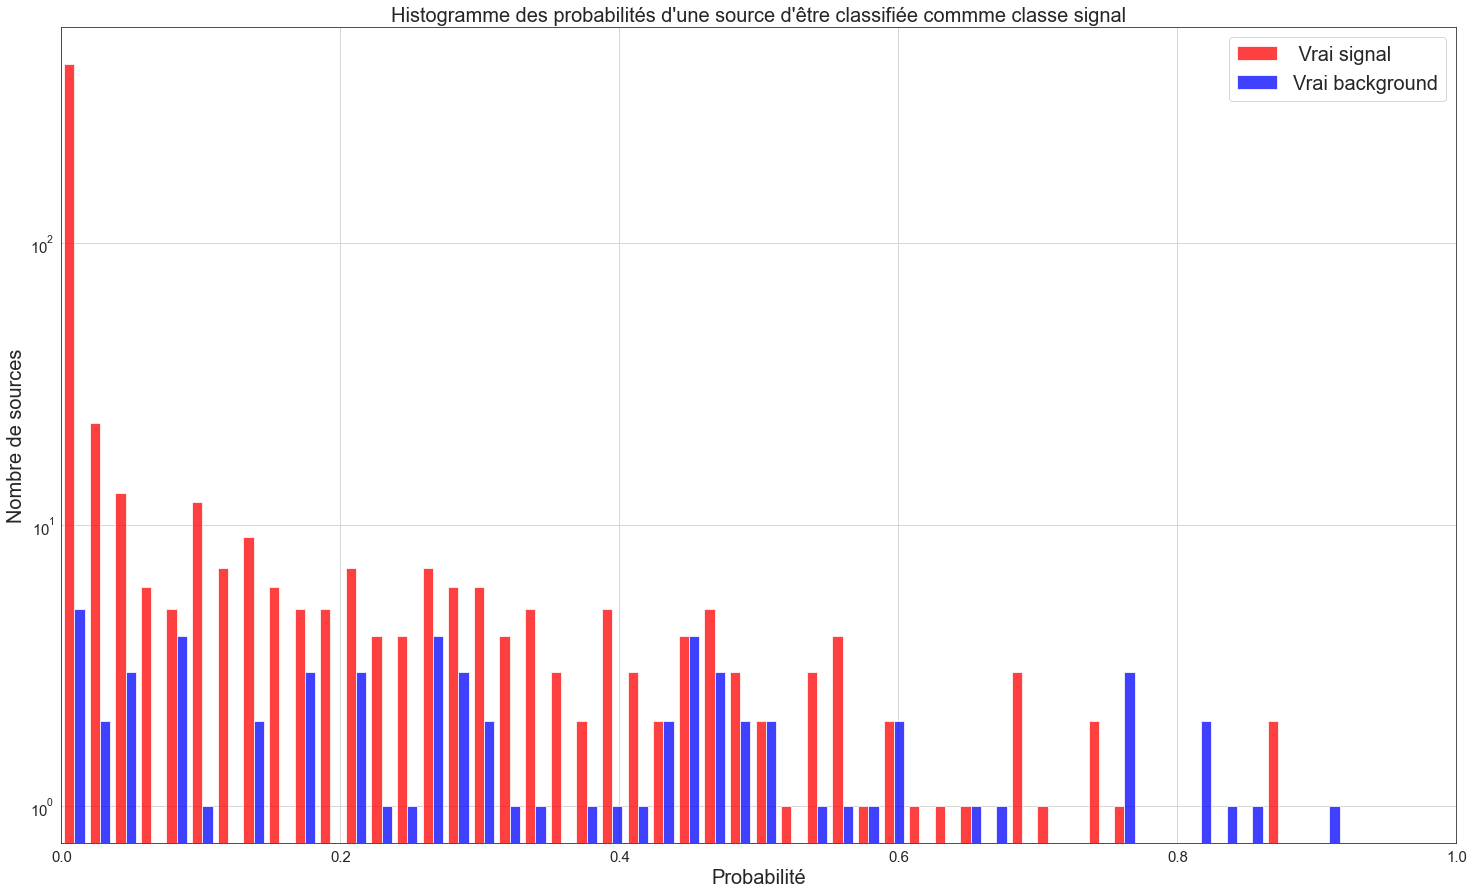

In [38]:
import seaborn as sns
sns.set_style("white")

# Plotting  model score distribution

#kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})

colors = ['r','b']
labels=[' Vrai signal','Vrai background']
fig = plt.figure(figsize=(25,15))
# ax1 = fig1.add_subplot(121)
plt.hist([OFF_true,ONN_true],50,color=colors,label=labels,alpha=0.75)
plt.xlabel("Probabilité",fontsize=20)
plt.ylabel("Nombre de sources",fontsize=20)
plt.title("Histogramme des probabilités d'une source d'être classifiée commme classe signal",fontsize=20)
#ax1.hist(OFF_true,20,color="r", label="Prob of being ON for all LC",density=True,alpha=0.75)
#ax1.hist(ONN_true,20,color="b", label="Prob of being ON for all LC",density=True,alpha=0.75)

#sns.distplot(ONN, color="g", label="Prob of beiung ON for all LC")
#sns.distplot(OFF_true, color="r", label="Prob of being ON for OFF LC")

plt.xlim(0,1)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
#sns.distplot(ONN, color="dodgerblue", label="Prob ON")
#sns.distplot(OFFF, color="orange", label="OFF")
#plt.title("Score density")
plt.yscale('log')
#plt.xlim(0,1)
#plt.ylim(0.01,800)
plt.grid()

plt.legend(fontsize=20);



NameError: name 'OFF_true' is not defined

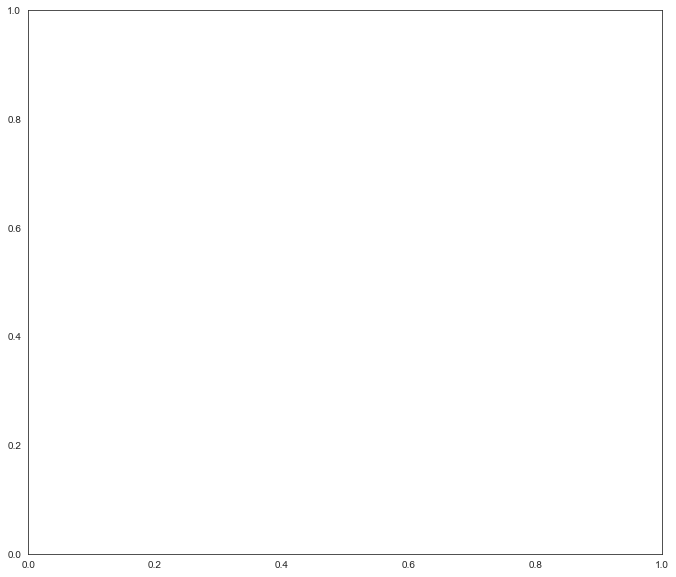

In [36]:

fig2 = plt.figure(figsize=(25,10))
ax2 = fig2.add_subplot(121)
ax2.hist(OFF_true,color="r", label="Prob of being ON for the OFF class", alpha=0.75,bins=20)
# sns.distplot(OFF_true, color="g", label="Prob of beiung ON for all LC")
ax2.set_yscale('log')

plt.xlim(0,1)


(array([1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 1., 1., 3., 0., 2., 0., 0., 0., 2., 2.,
        1., 0., 0., 0., 0., 0., 1., 0., 1., 3., 1., 2., 1., 1., 2., 2.]),
 array([0.168  , 0.18392, 0.19984, 0.21576, 0.23168, 0.2476 , 0.26352,
        0.27944, 0.29536, 0.31128, 0.3272 , 0.34312, 0.35904, 0.37496,
        0.39088, 0.4068 , 0.42272, 0.43864, 0.45456, 0.47048, 0.4864 ,
        0.50232, 0.51824, 0.53416, 0.55008, 0.566  , 0.58192, 0.59784,
        0.61376, 0.62968, 0.6456 , 0.66152, 0.67744, 0.69336, 0.70928,
        0.7252 , 0.74112, 0.75704, 0.77296, 0.78888, 0.8048 , 0.82072,
        0.83664, 0.85256, 0.86848, 0.8844 , 0.90032, 0.91624, 0.93216,
        0.94808, 0.964  ]),
 <BarContainer object of 50 artists>)

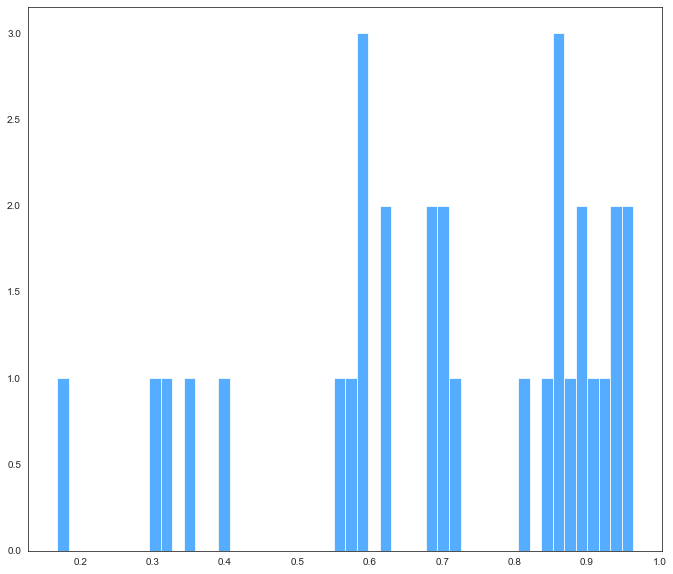

In [322]:

fig3 = plt.figure(figsize=(25,10))
ax3 = fig3.add_subplot(121)
ax3.hist(ONN_true,color="dodgerblue", label="Prob of being ON for the ON class",alpha=0.75,bins=50)
#plt.xlim(0,1)

In [67]:
ONN_true

[0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0]

In [32]:
model.feature_importances_

array([0.06458918, 0.07954362, 0.06649475, 0.06611277, 0.05998535,
       0.07421538, 0.10157816, 0.09577086, 0.06698721, 0.07104465,
       0.12818503, 0.12549303])

In [33]:
feature_importances = pd.DataFrame(model.feature_importances_, index =np.arange(9),  columns=['importance']).sort_values('importance', ascending=False)

ValueError: Shape of passed values is (12, 1), indices imply (9, 1)

In [ ]:
feature_importances

In [34]:
data_matrix[8]=one_two_time
data_matrix[10]=max_diff_mean_peaks_arr_flux
data_matrix[11]=min_diff_mean_peaks_arr_flux

data_matrix[4]=min_max
data_matrix[6]=mean_arr_flux
data_matrix[5]=std_flux
data_matrix[2]=deltaT_std
data_matrix[3]=mean_peaks_arr_flux
data_matrix[0]=peaks_time_delay_arr_flux
data_matrix[9]=NG_diff_mean_peaks_arr_flux
data_matrix[7]=one_two_flux
data_matrix[1]=std_peaks_arr_flux

ValueError: could not broadcast input array from shape (1142,) into shape (12,)

In [ ]:
min()